In [1]:
import numpy as np

In [2]:
# Импортируем библиотеку matplotlib.pyplot
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import sympy as sp

In [4]:
from math import sqrt

In [5]:
from sympy.plotting import plot3d

In [6]:
from sympy.plotting.plot import MatplotlibBackend, Plot

In [7]:
x1 = sp.symbols("x1")

In [8]:
x2 = sp.symbols("x2")

In [22]:
#f = 1.5*x1**2 + x2**2 - 2*x1*x2 + 2*x1**3+ 0.5*x1**4
#f = (x1-2)**2+(x2-3)**2
f = 3*x1**2 + x1*x2 + 2*x2**2-x1-4*x2

In [23]:
def dfdx1(f, x1):
    return sp.diff(f, x1)

In [24]:
def dfdx2(f, x2):
    return sp.diff(f, x2)

In [25]:
def norm_grad(f, x1, x2, x01, x02):
    return sqrt((dfdx1(f, x1).subs({x1: x01, x2: x02}))**2 + (dfdx2(f, x2).subs({x1: x01, x2: x02}))**2)

In [33]:
eps = 10**(-2)

In [34]:
alpha = 1

In [35]:
x01 = 1

In [36]:
x02 = 1

In [37]:
def gradient_descent(xi1, xi2, alpha):
    x01 = xi1
    x02 = xi2
    
    max_iterations = 1000
    
    exit = False
    iteration = 0
    while not exit:
        iteration += 1
        
        xi1 = x01 - alpha * dfdx1(f, x1).subs({x1: x01, x2: x02})
        xi2 = x02 - alpha * dfdx2(f, x2).subs({x1: x01, x2: x02})

        if f.subs({x1: xi1, x2: xi2}) < f.subs({x1: x01, x2: x02}):
            x01 = xi1
            x02 = xi2
            
            if norm_grad(f, x1, x2, x01, x02) < eps:
                exit = True
                break
        else:
            alpha = alpha / 2
            
        if iteration >= max_iterations:
            break
                
    f0 = f.subs({x1: x01, x2: x02})           
    return x01, x02, f0

In [38]:
x1_res, x2_res, f_res = gradient_descent(x01, x02, alpha)

In [39]:
print(x1_res, x2_res, f_res)

-0.00120374560356140 0.999501392245293 -1.99999455557329


In [40]:
def get_sympy_subplots(plot:Plot):
    backend = MatplotlibBackend(plot)

    backend.process_series()
    backend.fig.tight_layout()
    return backend.plt

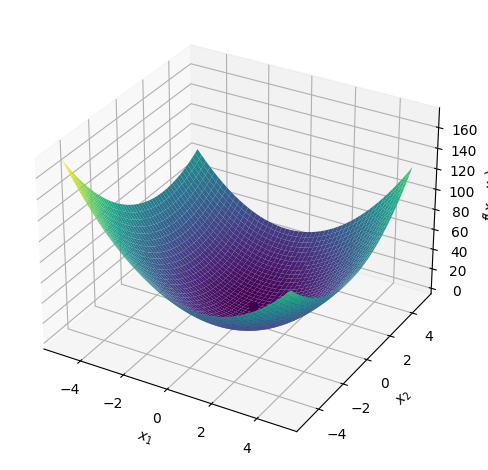

In [41]:
p = plot3d(f, (x1, -5, 5), (x2, -5, 5), show=False)
plt = get_sympy_subplots(p)
plt.plot(x1_res, x2_res, f_res, 'o', color='k')